Assignment Details:

1.       Explore the data-set and find the relationship of features (x1...x4) to target (y).
2.       Create a model that can predict 'y' given features.
3.       Select the best model using various model selection techniques.
4.       Tune the hyper-parameters for best possible classification metrics.

In [83]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# import csv data
df = pd.read_csv('ZI_Assignment_Data_Set.csv')
df.head()

,Unnamed: 0,x1,x2,x3,x4,y
0,0,-4.326537,-0.552119,5.847767,1,0
1,1,0.970155,1.980708,-2.049272,0,1
2,2,9.963707,5.158819,-4.560561,0,1
3,3,12.748365,-9.561007,-4.742933,0,1
4,4,4.648604,-4.312924,9.130622,1,0


In [84]:
print(df.columns)
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'y'], dtype='object')


,x1,x2,x3,x4,y
0,-4.326537,-0.552119,5.847767,1,0
1,0.970155,1.980708,-2.049272,0,1
2,9.963707,5.158819,-4.560561,0,1
3,12.748365,-9.561007,-4.742933,0,1
4,4.648604,-4.312924,9.130622,1,0


In [89]:
print(df.isna().sum(),'\n\n')
# df = df.where((pd.notnull(df)),'') # replace NaN values if any
# how would replace null values across columns, check that write codes

print(df.info(),'\n\n')
print(df.describe(),'\n\n')

print("Unique values in target")
print(df.y.value_counts())

print("Event rate for target : \n",df.y.value_counts()/df.shape[0])

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x1      100000 non-null  float64
 1   x2      100000 non-null  float64
 2   x3      100000 non-null  float64
 3   x4      100000 non-null  int64  
 4   y       100000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.8 MB
None 


                  x1             x2             x3             x4  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        7.502228       0.029169      -0.002664       0.499020   
std         5.603133       5.770298       5.766394       0.500002   
min       -15.025862      -9.999766      -9.999965       0.000000   
25%         3.695063      -4.959535      -4.992872       0.000000   
50%         7.520307       0.064876       0.008822       0.000000   
75%        11.328508       5

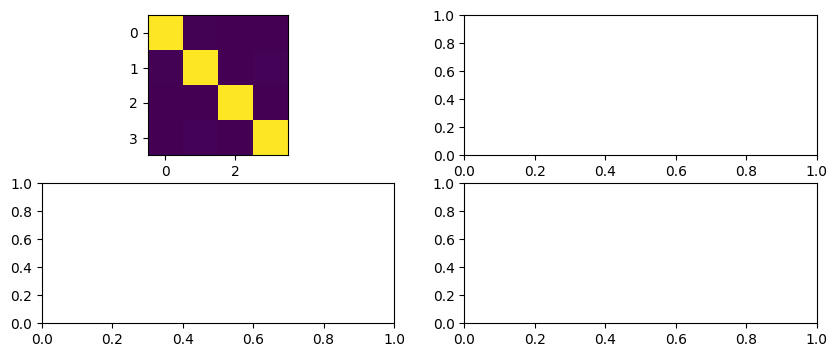

In [100]:
# checking for correleation between features

corr = df.loc[:,df.columns != 'y'].corr()

fig, ax = plt.subplots(2,2, figsize=(10,4))

ax[0,0].imshow(corr)
ax[0,0].set
plt.show()

In [ ]:
# checking for outliers



In [85]:
# train test split

x = df.loc[:,df.columns != 'y']
y = df['y']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [86]:
# feature scaling

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
# function for performance evaluation metrics for models

def model_performance(y_test,y_test_predict):
    print("\n\nConfusion matrix :\n",metrics.confusion_matrix(y_test,y_test_predict))
    print("\n\nClassification report :\n",metrics.classification_report(y_test,y_test_predict))
    print("\nAccuracy score :",metrics.accuracy_score(y_test,y_test_predict))
    print("\nAUC-ROC Value :",metrics.roc_auc_score(y_test,y_test_predict))
    print("\nAUC-ROC Value :",metrics.roc_auc_score(y_test,y_test_predict))
    plt.figure(figsize=(5,5))
    precision, recall, _ = metrics.precision_recall_curve(y_test,y_test_pre_prob)
    plt.fill_between(recall, precision, color = 'lightgrey')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve')
    plt.show()

In [58]:
# baseline model

model = DummyClassifier(strategy='most_frequent').fit(x_train_scaled,y_train)
y_train_predict = model.predict(x_train_scaled)
y_test_predict = model.predict(x_test_scaled)

print("Baseline model - Train data performance")
model_performance(y_train,y_train_predict)
print("Baseline model - Test data performance")
model_performance(y_test,y_test_predict)

Baseline model - Train data performance


Confusion matrix :
 [[    0 27095]
 [    0 52905]]


Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     27095
           1       0.66      1.00      0.80     52905

    accuracy                           0.66     80000
   macro avg       0.33      0.50      0.40     80000
weighted avg       0.44      0.66      0.53     80000


Accuracy score : 0.6613125

AUC-ROC Value : 0.5
Baseline model - Test data performance


Confusion matrix :
 [[    0  6666]
 [    0 13334]]


Classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      6666
           1       0.67      1.00      0.80     13334

    accuracy                           0.67     20000
   macro avg       0.33      0.50      0.40     20000
weighted avg       0.44      0.67      0.53     20000


Accuracy score : 0.6667

AUC-ROC Value : 0.5


/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/priya/

In [82]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.8 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [81]:

pipeline = ([
    ('lr':LogisticRegression()),
    ('rf':RandomForestClassifier()),
    ('SVC':SVC())
    ('KNN':KNeighborsClassifier())
    ('XGboost':XGBClassifier())
])


,x1,x2,x3,x4,y
0,-4.326537,-0.552119,5.847767,1,0
1,0.970155,1.980708,-2.049272,0,1
2,9.963707,5.158819,-4.560561,0,1
3,12.748365,-9.561007,-4.742933,0,1
4,4.648604,-4.312924,9.130622,1,0


In [59]:
from pipelinehelper import PipelineHelper

ModuleNotFoundError: No module named 'pipelinehelper'

In [73]:
pip install --upgrade setuptools wheel

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 1.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install scikit-learn SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL==True

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL==True (from versions: none)
ERROR: No matching distribution found for SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL==True
Note: you may need to restart the kernel to use updated packages.


In [66]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a machine learning pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Feature Scaling
    ('classifier', RandomForestClassifier(n_estimators=100))  # Step 2: Classifier
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

grid = GridSearchCV(pipeline, params, scoring='accuracy', verbose=1)
print(grid.best_params_)
print(grid.best_score_)


Accuracy: 1.00


In [65]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from pipelinehelper import PipelineHelper

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('max', MaxAbsScaler()),
    ])),
    ('classifier', PipelineHelper([
        ('svm', LinearSVC()),
        ('rf', RandomForestClassifier()),
    ])),
])

params = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True, False],
        'std__with_std': [True, False],
        'max__copy': [True],  # just for displaying
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        'svm__C': [0.1, 1.0],
        'rf__n_estimators': [100, 20],
    })
}
grid = GridSearchCV(pipe, params, scoring='accuracy', verbose=1)
grid.fit(X_iris, y_iris)
print(grid.best_params_)
print(grid.best_score_)

ModuleNotFoundError: No module named 'pipelinehelper'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Event rate for target : 
 ham     86.593683
spam    13.406317
Name: Category, dtype: float64
Empty DataFrame
Columns: []
Index: [(ham, 0), (spam, 1)]


Confusion matrix :
 [[490 470]
 [ 65  90]]


Classification report :
               precision    recall  f1-score   support

           0       0.88      0.51      0.65       960
           1       0.16      0.58      0.25       155

    accuracy                           0.52      1115
   macro avg       0.52      0.55      0.45      1115
weighted avg       0.78      0.52      0.59      1115


Accuracy score : 0.5201793721973094

AUC-ROC Value : 0.5455309139784947

AUC-PR Value 0.39982770556508446


Confusion matrix :
 [[960   0]
 [ 38 117]]


/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/priya/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(




Confusion matrix :
 [[959   1]
 [ 19 136]]


Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       960
           1       0.99      0.88      0.93       155

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy score : 0.9820627802690582

AUC-ROC Value : 0.9381888440860215

AUC-PR Value 0.9435802217550558


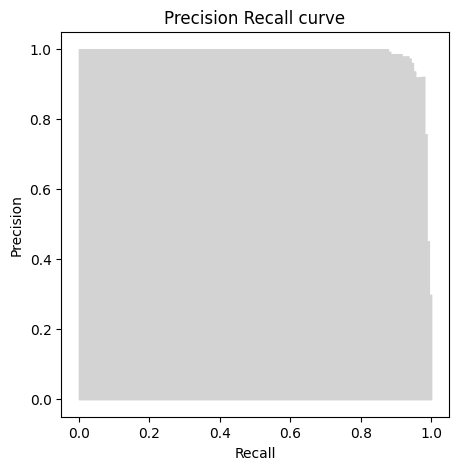

0.9865650637154282


In [32]:
model_list = [
LogisticRegression(),
LogisticRegression(C=1, solver='newton-cg', penalty='l2', max_iter=100),
LogisticRegression(C=1, solver='lbfgs', penalty='l2', max_iter=100),
LogisticRegression(C=1, solver='sag', penalty='l2', max_iter=100),
LogisticRegression(C=1, solver='saga', penalty='l2', max_iter=100)
]

for model in model_list:
    model.fit(x_train_feature,y_train)
    y_train_predict = model.predict(x_train_feature)
    y_test_predict = model.predict(x_test_feature)
    model_performance(y_test,y_test_predict)

model = LogisticRegression()
model_cv = {'C':[0.1,1,10],
        'solver':['newton-cg','lbfgs','sag','saga'],
        'penalty':['l2'],
        'max_iter':[100]}

model_GSCV = GridSearchCV(estimator=model,param_grid = model_cv,cv=3).fit(x_train_feature,y_train)

model = LogisticRegression(**model_GSCV.best_params_).fit(x_train_feature,y_train)
y_train_predict = model.predict(x_train_feature)
y_test_predict = model.predict(x_test_feature)
y_test_pre_prob = model.predict_proba(x_test_feature)[:,1]
model_performance(y_test,y_test_predict)

plt.figure(figsize=(5,5))
precision, recall, _ = metrics.precision_recall_curve(y_test,y_test_pre_prob)
plt.fill_between(recall, precision, color = 'lightgrey')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.show()

print(metrics.auc(recall, precision))

pickle.dump(model,open('model.pkl','wb'))
pickle.dump(vector,open('vector.pkl','wb'))